In [94]:
import pandas as pd
import ast
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import zscore
from sklearn.preprocessing import MinMaxScaler
import json

01 EXTRACCION

- Leer los archivos movies_dataset y credits los cuales se encuentran en format CSV y cargarlos en un dataframe para cada cual

In [95]:
df_cre = pd.read_csv("credits.csv")
df_mov = pd.read_csv("movies_dataset.csv")

C:\Users\LP\AppData\Local\Temp\ipykernel_5900\3503367866.py:2: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  df_mov = pd.read_csv("movies_dataset.csv")


- "movies_dataset"

- Usar .head(3) para leer los 3 primeros registros de cada DF e indentificar las columnas y parte del contenido de cada uno

In [96]:
df_mov.head(3)

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,...,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
0,False,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",http://toystory.disney.com/toy-story,862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",...,1995-10-30,373554033.0,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Toy Story,False,7.7,5415.0
1,False,NaN,65000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",NaN,8844,tt0113497,en,Jumanji,When siblings Judy and Peter discover an encha...,...,1995-12-15,262797249.0,104.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Roll the dice and unleash the excitement!,Jumanji,False,6.9,2413.0
2,False,"{'id': 119050, 'name': 'Grumpy Old Men Collect...",0,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",NaN,15602,tt0113228,en,Grumpier Old Men,A family wedding reignites the ancient feud be...,...,1995-12-22,0.0,101.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Still Yelling. Still Fighting. Still Ready for...,Grumpier Old Men,False,6.5,92.0


In [97]:
df_cre.head(3)

,cast,crew,id
0,"[{'cast_id': 14, 'character': 'Woody (voice)',...","[{'credit_id': '52fe4284c3a36847f8024f49', 'de...",862
1,"[{'cast_id': 1, 'character': 'Alan Parrish', '...","[{'credit_id': '52fe44bfc3a36847f80a7cd1', 'de...",8844
2,"[{'cast_id': 2, 'character': 'Max Goldman', 'c...","[{'credit_id': '52fe466a9251416c75077a89', 'de...",15602


- De acuerdo a la propuesta de trabajo, procedemos a eliminar las columnas que no serán utilizadas, video,imdb_id,adult,original_title,poster_path y homepage

In [98]:
df_mov = df_mov.drop(columns=['video', 'imdb_id', 'adult', 'original_title', 'poster_path', 'homepage'])

In [99]:
df_mov.head(3)

,belongs_to_collection,budget,genres,id,original_language,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",862,en,"Led by Woody, Andy's toys live happily in his ...",21.946943,"[{'name': 'Pixar Animation Studios', 'id': 3}]","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-10-30,373554033.0,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Toy Story,7.7,5415.0
1,NaN,65000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",8844,en,When siblings Judy and Peter discover an encha...,17.015539,"[{'name': 'TriStar Pictures', 'id': 559}, {'na...","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-15,262797249.0,104.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Roll the dice and unleash the excitement!,Jumanji,6.9,2413.0
2,"{'id': 119050, 'name': 'Grumpy Old Men Collect...",0,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",15602,en,A family wedding reignites the ancient feud be...,11.7129,"[{'name': 'Warner Bros.', 'id': 6194}, {'name'...","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-22,0.0,101.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Still Yelling. Still Fighting. Still Ready for...,Grumpier Old Men,6.5,92.0


- Identificar las columnas anidadas, las cuales son belongs_to_collection, genres, production_companies, production_countries y spoken_languages, revisar cada una

belongs_to_collection

In [100]:
df_mov[['belongs_to_collection']].head()

,belongs_to_collection
0,"{'id': 10194, 'name': 'Toy Story Collection', ..."
1,NaN
2,"{'id': 119050, 'name': 'Grumpy Old Men Collect..."
3,NaN
4,"{'id': 96871, 'name': 'Father of the Bride Col..."


- Revisar el contenido

In [101]:
df_mov['belongs_to_collection'].iloc[0]

"{'id': 10194, 'name': 'Toy Story Collection', 'poster_path': '/7G9915LfUQ2lVfwMEEhDsn3kT4B.jpg', 'backdrop_path': '/9FBwqcd9IRruEDUrTdcaafOMKUq.jpg'}"

- Identificar el tipo

In [102]:
type(df_mov['belongs_to_collection'].iloc[0])

str

- Al ser una cadena de texto, debemos convertir a dicionario para poder trabajarlo

In [103]:
df_mov['belongs_to_collection'] = df_mov['belongs_to_collection'].apply(
    lambda x: ast.literal_eval(x) if isinstance(x, str) else None
)

In [104]:
belongs_to_collection_df = df_mov['belongs_to_collection'].apply(pd.Series)

In [105]:
belongs_to_collection_df

,id,name,poster_path,backdrop_path,0
0,10194.0,Toy Story Collection,/7G9915LfUQ2lVfwMEEhDsn3kT4B.jpg,/9FBwqcd9IRruEDUrTdcaafOMKUq.jpg,NaN
1,NaN,NaN,NaN,NaN,NaN
2,119050.0,Grumpy Old Men Collection,/nLvUdqgPgm3F85NMCii9gVFUcet.jpg,/hypTnLot2z8wpFS7qwsQHW1uV8u.jpg,NaN
3,NaN,NaN,NaN,NaN,NaN
4,96871.0,Father of the Bride Collection,/nts4iOmNnq7GNicycMJ9pSAn204.jpg,/7qwE57OVZmMJChBpLEbJEmzUydk.jpg,NaN
...,...,...,...,...,...
45461,NaN,NaN,NaN,NaN,NaN
45462,NaN,NaN,NaN,NaN,NaN
45463,NaN,NaN,NaN,NaN,NaN
45464,NaN,NaN,NaN,NaN,NaN


- Nos quedamos solo con las columna name, pues creo que no sera necesario el resto

In [106]:
belongs_to_collection_df = belongs_to_collection_df.rename(
    columns={        
        'name': 'collection_name'        
    }
)

In [107]:
df_mov = pd.concat([df_mov, belongs_to_collection_df[['collection_name']]], axis=1)
df_mov = df_mov.drop(columns=['belongs_to_collection'])

In [108]:
df_mov.columns

Index(['budget', 'genres', 'id', 'original_language', 'overview', 'popularity',
       'production_companies', 'production_countries', 'release_date',
       'revenue', 'runtime', 'spoken_languages', 'status', 'tagline', 'title',
       'vote_average', 'vote_count', 'collection_name'],
      dtype='object')

genres

In [109]:
df_mov[['genres']].head

<bound method NDFrame.head of                                                   genres
0      [{'id': 16, 'name': 'Animation'}, {'id': 35, '...
1      [{'id': 12, 'name': 'Adventure'}, {'id': 14, '...
2      [{'id': 10749, 'name': 'Romance'}, {'id': 35, ...
3      [{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...
4                         [{'id': 35, 'name': 'Comedy'}]
...                                                  ...
45461  [{'id': 18, 'name': 'Drama'}, {'id': 10751, 'n...
45462                      [{'id': 18, 'name': 'Drama'}]
45463  [{'id': 28, 'name': 'Action'}, {'id': 18, 'nam...
45464                                                 []
45465                                                 []

[45466 rows x 1 columns]>

- Revisar el contenido

In [110]:
df_mov['genres'].iloc[0]

"[{'id': 16, 'name': 'Animation'}, {'id': 35, 'name': 'Comedy'}, {'id': 10751, 'name': 'Family'}]"

- Identificar el contenido

In [111]:
type(df_mov['genres'].iloc[0])

str

- Al ser de tipo texto las pasamos a diccionario para poder trabajar

In [112]:
df_mov['genres'] = df_mov['genres'].apply(
    lambda x: ast.literal_eval(x) if pd.notna(x) else []
)

- Agregamos los generos como una nueva columna y eliminamos la original

In [113]:
df_mov['genre_names'] = df_mov['genres'].apply(
    lambda x: [genre['name'] for genre in x if isinstance(genre, dict)]
)

df_mov = df_mov.drop(columns=['genres'])

In [114]:
df_mov.head(3)

,budget,id,original_language,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count,collection_name,genre_names
0,30000000,862,en,"Led by Woody, Andy's toys live happily in his ...",21.946943,"[{'name': 'Pixar Animation Studios', 'id': 3}]","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-10-30,373554033.0,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Toy Story,7.7,5415.0,Toy Story Collection,"[Animation, Comedy, Family]"
1,65000000,8844,en,When siblings Judy and Peter discover an encha...,17.015539,"[{'name': 'TriStar Pictures', 'id': 559}, {'na...","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-15,262797249.0,104.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Roll the dice and unleash the excitement!,Jumanji,6.9,2413.0,NaN,"[Adventure, Fantasy, Family]"
2,0,15602,en,A family wedding reignites the ancient feud be...,11.7129,"[{'name': 'Warner Bros.', 'id': 6194}, {'name'...","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-22,0.0,101.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Still Yelling. Still Fighting. Still Ready for...,Grumpier Old Men,6.5,92.0,Grumpy Old Men Collection,"[Romance, Comedy]"


production_companies

In [115]:
df_mov[['production_companies']]

,production_companies
0,"[{'name': 'Pixar Animation Studios', 'id': 3}]"
1,"[{'name': 'TriStar Pictures', 'id': 559}, {'na..."
2,"[{'name': 'Warner Bros.', 'id': 6194}, {'name'..."
3,[{'name': 'Twentieth Century Fox Film Corporat...
4,"[{'name': 'Sandollar Productions', 'id': 5842}..."
...,...
45461,[]
45462,"[{'name': 'Sine Olivia', 'id': 19653}]"
45463,"[{'name': 'American World Pictures', 'id': 6165}]"
45464,"[{'name': 'Yermoliev', 'id': 88753}]"


- Revisar el contenido

In [116]:
df_mov['production_companies'].iloc[0] 

"[{'name': 'Pixar Animation Studios', 'id': 3}]"

- Identificar el tipo

In [117]:
type(df_mov['production_companies'].iloc[0])

str

- Al ser una cadena de texto, debemos convertir a dicionario para poder trabajarlo

In [118]:
# Convertir la columna de strings JSON a listas de diccionarios
df_mov['production_companies'] = df_mov['production_companies'].apply(
    lambda x: ast.literal_eval(x) if isinstance(x, str) and x.startswith('[') else []
)

# Expandir los diccionarios en filas separadas
desanidado_production_companies = df_mov.explode('production_companies')

# Convertir los diccionarios en columnas
desanidado_production_companies = pd.concat(
    [
        desanidado_production_companies,
        desanidado_production_companies['production_companies'].apply(pd.Series),
    ],
    axis=1,
)

# Eliminar la columna original 'production_companies' del DataFrame inicial
df_mov = df_mov.drop(columns=['production_companies'])

# Agregar las columnas desanidadas ('name', 'id') al DataFrame original
df_mov = df_mov.merge(
    desanidado_production_companies[['title', 'name']],
    on='title',
    how='left'
)


- Al haber desanidado en filas, ahora procedemos a unir las compañias productoras y eliminar las filas repetidas

In [119]:

desanidado_production_companies['name'] = desanidado_production_companies['name'].astype(str)

agrupado_production_companies = desanidado_production_companies.groupby('title')['name'].apply(
    lambda x: ', '.join(filter(None, x))
).reset_index()

df_mov = df_mov.drop(columns=['name'], errors='ignore')  # Eliminar columna duplicada si existe
df_mov = df_mov.merge(
    agrupado_production_companies,
    on='title',
    how='left'
).rename(columns={'name': 'production_companies_names'})

df_mov = df_mov.drop_duplicates(subset=['title']).reset_index(drop=True)

df_mov['production_companies_names'] = df_mov['production_companies_names'].apply(
    lambda x: x.split(", ") if isinstance(x, str) else x
)

In [120]:
df_mov.head(3)

,budget,id,original_language,overview,popularity,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count,collection_name,genre_names,production_companies_names
0,30000000,862,en,"Led by Woody, Andy's toys live happily in his ...",21.946943,"[{'iso_3166_1': 'US', 'name': 'United States o...",1995-10-30,373554033.0,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Toy Story,7.7,5415.0,Toy Story Collection,"[Animation, Comedy, Family]",[Pixar Animation Studios]
1,65000000,8844,en,When siblings Judy and Peter discover an encha...,17.015539,"[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-15,262797249.0,104.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Roll the dice and unleash the excitement!,Jumanji,6.9,2413.0,NaN,"[Adventure, Fantasy, Family]","[TriStar Pictures, Teitler Film, Interscope Co..."
2,0,15602,en,A family wedding reignites the ancient feud be...,11.7129,"[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-22,0.0,101.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Still Yelling. Still Fighting. Still Ready for...,Grumpier Old Men,6.5,92.0,Grumpy Old Men Collection,"[Romance, Comedy]","[Warner Bros., Lancaster Gate]"


production_countries

In [121]:
df_mov[['production_countries']].head()


,production_countries
0,"[{'iso_3166_1': 'US', 'name': 'United States o..."
1,"[{'iso_3166_1': 'US', 'name': 'United States o..."
2,"[{'iso_3166_1': 'US', 'name': 'United States o..."
3,"[{'iso_3166_1': 'US', 'name': 'United States o..."
4,"[{'iso_3166_1': 'US', 'name': 'United States o..."


- Revisar el contenido

In [122]:
df_mov['production_countries'].iloc[0]

"[{'iso_3166_1': 'US', 'name': 'United States of America'}]"

- Identificar el tipo

In [123]:
type(df_mov['production_countries'].iloc[0])

str

- Al ser una cadena de texto, debemos convertir a dicionario para poder trabajarlo

In [124]:
df_mov['production_countries'] = df_mov['production_countries'].apply(
    lambda x: ast.literal_eval(x) if pd.notna(x) else []
)

In [125]:
df_mov['production_countries_names'] = df_mov['production_countries'].apply(
    lambda x: [genre['name'] for genre in x if isinstance(genre, dict)]
)

In [126]:
df_mov = df_mov.drop(columns=['production_countries'])

In [127]:
df_mov.head(3)

,budget,id,original_language,overview,popularity,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count,collection_name,genre_names,production_companies_names,production_countries_names
0,30000000,862,en,"Led by Woody, Andy's toys live happily in his ...",21.946943,1995-10-30,373554033.0,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Toy Story,7.7,5415.0,Toy Story Collection,"[Animation, Comedy, Family]",[Pixar Animation Studios],[United States of America]
1,65000000,8844,en,When siblings Judy and Peter discover an encha...,17.015539,1995-12-15,262797249.0,104.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Roll the dice and unleash the excitement!,Jumanji,6.9,2413.0,NaN,"[Adventure, Fantasy, Family]","[TriStar Pictures, Teitler Film, Interscope Co...",[United States of America]
2,0,15602,en,A family wedding reignites the ancient feud be...,11.7129,1995-12-22,0.0,101.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Still Yelling. Still Fighting. Still Ready for...,Grumpier Old Men,6.5,92.0,Grumpy Old Men Collection,"[Romance, Comedy]","[Warner Bros., Lancaster Gate]",[United States of America]


In [128]:
df_mov.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42278 entries, 0 to 42277
Data columns (total 18 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   budget                      42278 non-null  object 
 1   id                          42278 non-null  object 
 2   original_language           42267 non-null  object 
 3   overview                    41363 non-null  object 
 4   popularity                  42277 non-null  object 
 5   release_date                42196 non-null  object 
 6   revenue                     42277 non-null  float64
 7   runtime                     42027 non-null  float64
 8   spoken_languages            42277 non-null  object 
 9   status                      42201 non-null  object 
 10  tagline                     19052 non-null  object 
 11  title                       42277 non-null  object 
 12  vote_average                42277 non-null  float64
 13  vote_count                  422

spoken_languages

In [129]:
df_mov['spoken_languages']

0                 [{'iso_639_1': 'en', 'name': 'English'}]
1        [{'iso_639_1': 'en', 'name': 'English'}, {'iso...
2                 [{'iso_639_1': 'en', 'name': 'English'}]
3                 [{'iso_639_1': 'en', 'name': 'English'}]
4                 [{'iso_639_1': 'en', 'name': 'English'}]
                               ...                        
42273             [{'iso_639_1': 'en', 'name': 'English'}]
42274               [{'iso_639_1': 'fa', 'name': 'فارسی'}]
42275                    [{'iso_639_1': 'tl', 'name': ''}]
42276                                                   []
42277             [{'iso_639_1': 'en', 'name': 'English'}]
Name: spoken_languages, Length: 42278, dtype: object

- Revisar el contenido


In [130]:
df_mov['spoken_languages'].iloc[0]

"[{'iso_639_1': 'en', 'name': 'English'}]"

- Identificar el tipo


In [131]:
type(df_mov['spoken_languages'].iloc[0])


str

- Al ser una cadena de texto, debemos convertir a dicionario para poder trabajarlo

In [132]:
df_mov['spoken_languages'] = df_mov['spoken_languages'].apply(
    lambda x: ast.literal_eval(x) if pd.notna(x) else []
)

In [133]:
df_mov['spoken_languages_names'] = df_mov['spoken_languages'].apply(
    lambda x: [genre['name'] for genre in x if isinstance(genre, dict)]
)

In [134]:
df_mov = df_mov.drop(columns=['spoken_languages'])

In [135]:
df_mov.head(3)

,budget,id,original_language,overview,popularity,release_date,revenue,runtime,status,tagline,title,vote_average,vote_count,collection_name,genre_names,production_companies_names,production_countries_names,spoken_languages_names
0,30000000,862,en,"Led by Woody, Andy's toys live happily in his ...",21.946943,1995-10-30,373554033.0,81.0,Released,NaN,Toy Story,7.7,5415.0,Toy Story Collection,"[Animation, Comedy, Family]",[Pixar Animation Studios],[United States of America],[English]
1,65000000,8844,en,When siblings Judy and Peter discover an encha...,17.015539,1995-12-15,262797249.0,104.0,Released,Roll the dice and unleash the excitement!,Jumanji,6.9,2413.0,NaN,"[Adventure, Fantasy, Family]","[TriStar Pictures, Teitler Film, Interscope Co...",[United States of America],"[English, Français]"
2,0,15602,en,A family wedding reignites the ancient feud be...,11.7129,1995-12-22,0.0,101.0,Released,Still Yelling. Still Fighting. Still Ready for...,Grumpier Old Men,6.5,92.0,Grumpy Old Men Collection,"[Romance, Comedy]","[Warner Bros., Lancaster Gate]",[United States of America],[English]


------

02 TRANSFORMACION

- Los valores nulos de los campos revenue, budget deben ser rellenados por el número 0

In [136]:
df_mov['revenue'] = df_mov['revenue'].fillna(0)
df_mov['budget'] = df_mov['budget'].fillna(0)

- Los valores nulos del campo release date deben eliminarse.

In [137]:
df_mov = df_mov.dropna(subset=['release_date'])

- De haber fechas, deberán tener el formato AAAA-mm-dd, además deberán crear la columna release_year donde extraerán el año de la fecha de estreno.

In [138]:
df_mov['release_date'] = pd.to_datetime(df_mov['release_date'], errors='coerce', format='%Y-%m-%d')

In [139]:
df_mov['release_year'] = df_mov['release_date'].dt.year

In [140]:
df_mov.head(3)

,budget,id,original_language,overview,popularity,release_date,revenue,runtime,status,tagline,title,vote_average,vote_count,collection_name,genre_names,production_companies_names,production_countries_names,spoken_languages_names,release_year
0,30000000,862,en,"Led by Woody, Andy's toys live happily in his ...",21.946943,1995-10-30,373554033.0,81.0,Released,NaN,Toy Story,7.7,5415.0,Toy Story Collection,"[Animation, Comedy, Family]",[Pixar Animation Studios],[United States of America],[English],1995
1,65000000,8844,en,When siblings Judy and Peter discover an encha...,17.015539,1995-12-15,262797249.0,104.0,Released,Roll the dice and unleash the excitement!,Jumanji,6.9,2413.0,NaN,"[Adventure, Fantasy, Family]","[TriStar Pictures, Teitler Film, Interscope Co...",[United States of America],"[English, Français]",1995
2,0,15602,en,A family wedding reignites the ancient feud be...,11.7129,1995-12-22,0.0,101.0,Released,Still Yelling. Still Fighting. Still Ready for...,Grumpier Old Men,6.5,92.0,Grumpy Old Men Collection,"[Romance, Comedy]","[Warner Bros., Lancaster Gate]",[United States of America],[English],1995


- Crear la columna con el retorno de inversión, llamada return con los campos revenue y budget, dividiendo estas dos últimas revenue / budget, cuando no hay datos disponibles para calcularlo, deberá tomar el valor 0

In [141]:
df_mov['revenue'] = pd.to_numeric(df_mov['revenue'], errors='coerce').fillna(0)
df_mov['budget'] = pd.to_numeric(df_mov['budget'], errors='coerce').fillna(0)

df_mov['return'] = df_mov.apply(
    lambda row: row['revenue'] / row['budget'] if row['budget'] > 0 else 0, axis=1
)

In [142]:
df_mov.head(3)

,budget,id,original_language,overview,popularity,release_date,revenue,runtime,status,tagline,title,vote_average,vote_count,collection_name,genre_names,production_companies_names,production_countries_names,spoken_languages_names,release_year,return
0,30000000,862,en,"Led by Woody, Andy's toys live happily in his ...",21.946943,1995-10-30,373554033.0,81.0,Released,NaN,Toy Story,7.7,5415.0,Toy Story Collection,"[Animation, Comedy, Family]",[Pixar Animation Studios],[United States of America],[English],1995,12.451801
1,65000000,8844,en,When siblings Judy and Peter discover an encha...,17.015539,1995-12-15,262797249.0,104.0,Released,Roll the dice and unleash the excitement!,Jumanji,6.9,2413.0,NaN,"[Adventure, Fantasy, Family]","[TriStar Pictures, Teitler Film, Interscope Co...",[United States of America],"[English, Français]",1995,4.043035
2,0,15602,en,A family wedding reignites the ancient feud be...,11.7129,1995-12-22,0.0,101.0,Released,Still Yelling. Still Fighting. Still Ready for...,Grumpier Old Men,6.5,92.0,Grumpy Old Men Collection,"[Romance, Comedy]","[Warner Bros., Lancaster Gate]",[United States of America],[English],1995,0.000000


In [143]:
df_mov.info()

<class 'pandas.core.frame.DataFrame'>
Index: 42196 entries, 0 to 42277
Data columns (total 20 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   budget                      42196 non-null  int64         
 1   id                          42196 non-null  object        
 2   original_language           42185 non-null  object        
 3   overview                    41294 non-null  object        
 4   popularity                  42196 non-null  object        
 5   release_date                42196 non-null  datetime64[ns]
 6   revenue                     42196 non-null  float64       
 7   runtime                     41957 non-null  float64       
 8   status                      42121 non-null  object        
 9   tagline                     19039 non-null  object        
 10  title                       42196 non-null  object        
 11  vote_average                42196 non-null  float64       


EVALUAR DUPLICADOS

In [144]:
df_mov = df_mov.applymap(lambda x: str(x) if isinstance(x, list) else x)

C:\Users\LP\AppData\Local\Temp\ipykernel_5900\1674215437.py:1: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df_mov = df_mov.applymap(lambda x: str(x) if isinstance(x, list) else x)


In [145]:
duplicados = df_mov.duplicated().sum()

In [146]:
duplicados

0

- No hay valores duplicados que eliminar

EVALUAR OUTLIERS


--- Evaluando outliers para la columna: budget ---
Outliers detectados con IQR en 'budget': 8256
Outliers detectados con Z-Score en 'budget': 871


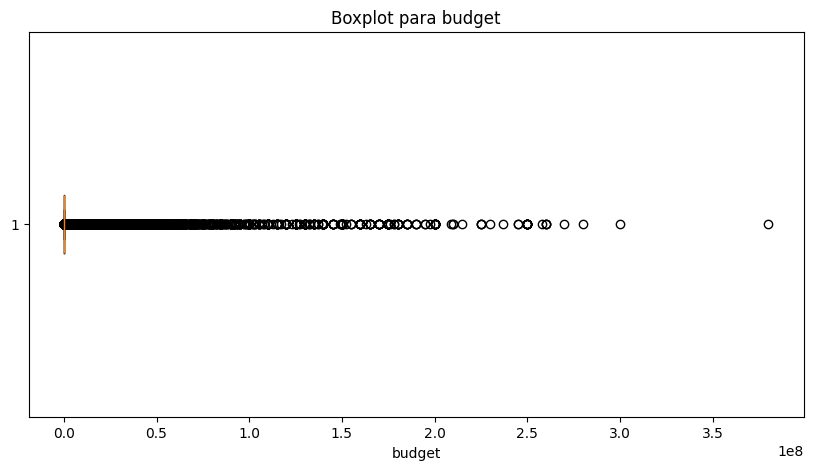


--- Evaluando outliers para la columna: revenue ---
Outliers detectados con IQR en 'revenue': 6943
Outliers detectados con Z-Score en 'revenue': 615


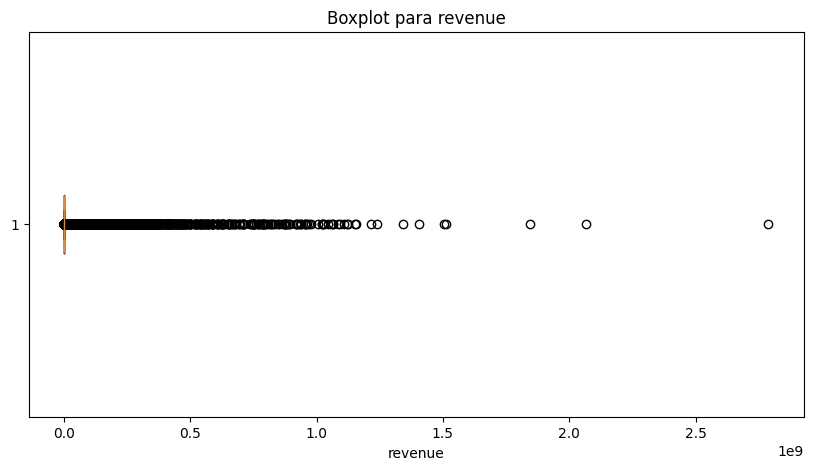


--- Evaluando outliers para la columna: runtime ---
Outliers detectados con IQR en 'runtime': 4973
Outliers detectados con Z-Score en 'runtime': 0


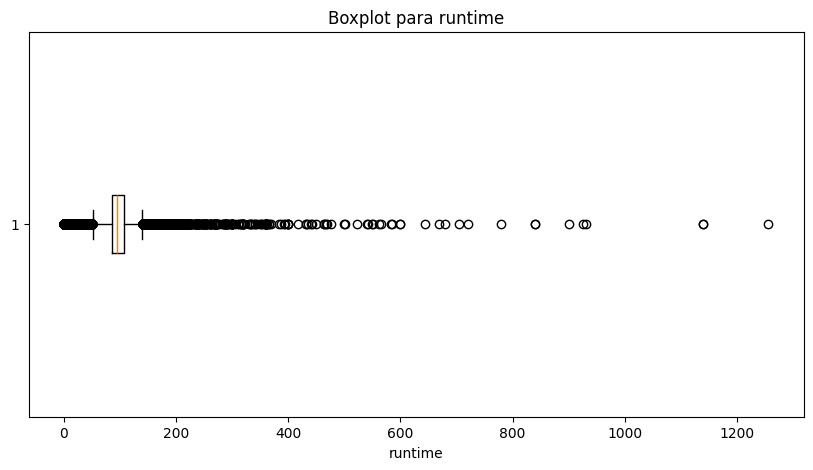


--- Evaluando outliers para la columna: vote_average ---
Outliers detectados con IQR en 'vote_average': 3317
Outliers detectados con Z-Score en 'vote_average': 0


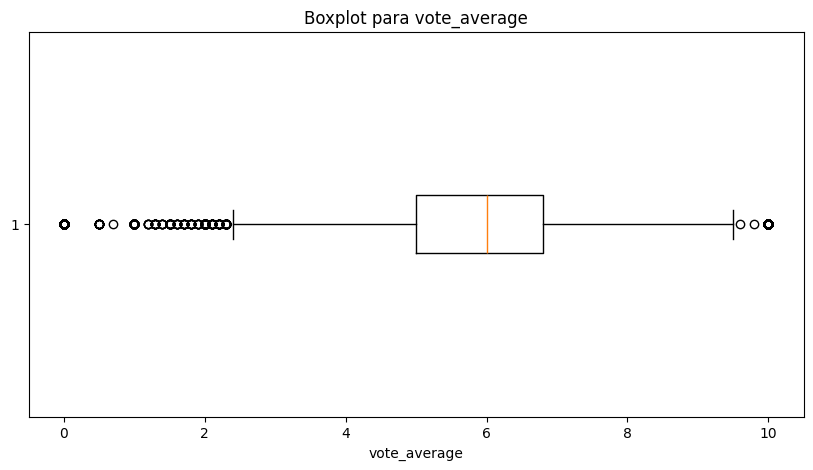


--- Evaluando outliers para la columna: vote_count ---
Outliers detectados con IQR en 'vote_count': 6256
Outliers detectados con Z-Score en 'vote_count': 633


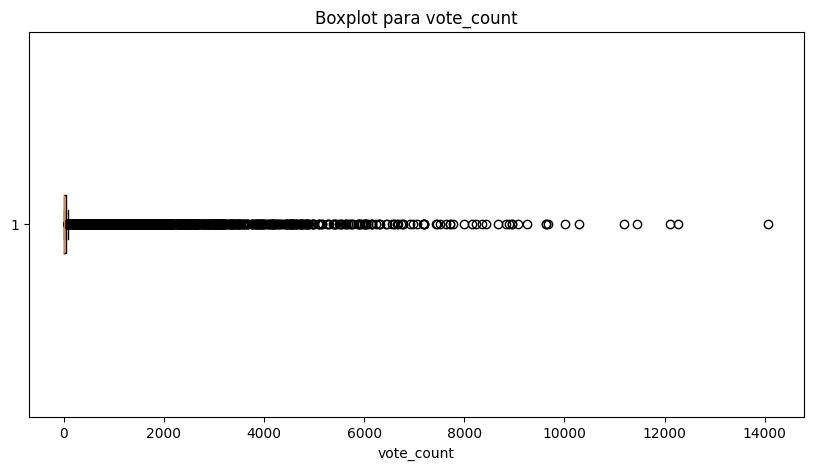


--- Evaluando outliers para la columna: return ---
Outliers detectados con IQR en 'return': 5020
Outliers detectados con Z-Score en 'return': 6


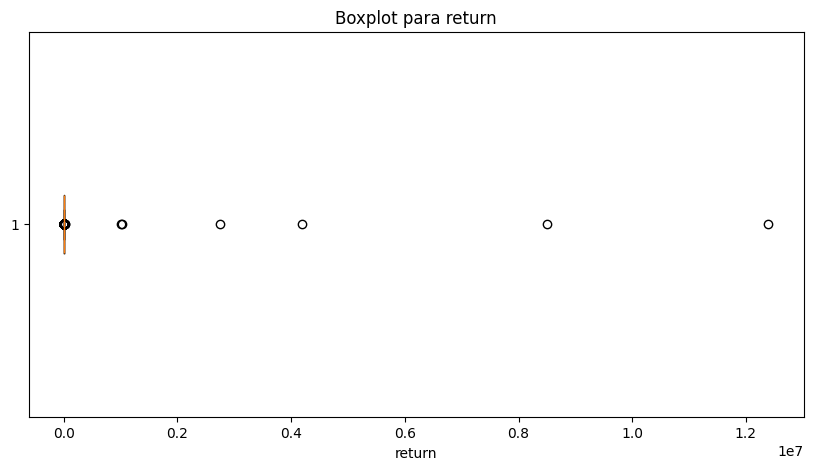


Resumen de Outliers Detectados:
budget: {'IQR Outliers': 8256, 'Z-Score Outliers': 871}
revenue: {'IQR Outliers': 6943, 'Z-Score Outliers': 615}
runtime: {'IQR Outliers': 4973, 'Z-Score Outliers': 0}
vote_average: {'IQR Outliers': 3317, 'Z-Score Outliers': 0}
vote_count: {'IQR Outliers': 6256, 'Z-Score Outliers': 633}
return: {'IQR Outliers': 5020, 'Z-Score Outliers': 6}


In [147]:
# Columnas numéricas relevantes para evaluar outliers
numeric_columns = ['budget', 'revenue', 'runtime', 'vote_average', 'vote_count', 'return']

# Resultados para almacenamiento de outliers
outliers_summary = {}

# Evaluación de outliers con IQR y Z-Score
for col in numeric_columns:
    print(f"\n--- Evaluando outliers para la columna: {col} ---")
    
    # Cálculo del Rango Intercuartil (IQR)
    Q1 = df_mov[col].quantile(0.25)
    Q3 = df_mov[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # Identificación de outliers
    iqr_outliers = df_mov[(df_mov[col] < lower_bound) | (df_mov[col] > upper_bound)]
    print(f"Outliers detectados con IQR en '{col}': {len(iqr_outliers)}")
    
    # Cálculo de Z-Scores
    df_mov[f'{col}_zscore'] = zscore(df_mov[col])
    z_outliers = df_mov[(df_mov[f'{col}_zscore'] > 3) | (df_mov[f'{col}_zscore'] < -3)]
    print(f"Outliers detectados con Z-Score en '{col}': {len(z_outliers)}")
    
    # Almacenar resultados
    outliers_summary[col] = {
        'IQR Outliers': len(iqr_outliers),
        'Z-Score Outliers': len(z_outliers)
    }
    
    # Visualización con Boxplot
    plt.figure(figsize=(10, 5))
    plt.boxplot(df_mov[col].dropna(), vert=False)
    plt.title(f"Boxplot para {col}")
    plt.xlabel(col)
    plt.show()

# Mostrar Resumen de Outliers
print("\nResumen de Outliers Detectados:")
for col, summary in outliers_summary.items():
    print(f"{col}: {summary}")


columnas_a_eliminar = ['budget_zscore','revenue_zscore','runtime_zscore','vote_average_zscore','vote_count_zscore','return_zscore']
df_mov = df_mov.drop(columns=columnas_a_eliminar)


- De acuerdo a los outliers detectados, realizamos las siguientes acciones

In [148]:
# Manejar 'budget'
df_mov['budget_log'] = np.log1p(df_mov['budget'])  # Transformación logarítmica
# Filtrar presupuestos irreales (ejemplo: negativos o extremadamente bajos)
df_mov = df_mov[df_mov['budget'] > 0]

# Manejar 'revenue'
# Filtrar ingresos irreales (ejemplo: negativos)
df_mov = df_mov[df_mov['revenue'] >= 0]

# Manejar 'runtime'
# Filtrar duraciones fuera de un rango razonable
df_mov = df_mov[(df_mov['runtime'] > 10) & (df_mov['runtime'] < 300)]

# Manejar 'vote_average'
# Escalar el promedio de votos entre 0 y 1
scaler = MinMaxScaler()
df_mov['vote_average_scaled'] = scaler.fit_transform(df_mov[['vote_average']])

# Manejar 'vote_count'
# Filtrar películas con muy pocos votos (irrelevantes)
df_mov = df_mov[df_mov['vote_count'] >= 10]

# Manejar 'return'
# Filtrar retornos negativos o irreales
df_mov = df_mov[df_mov['return'] >= 0]

columnas_a_eliminar = ['budget_log','vote_average_scaled']
df_mov = df_mov.drop(columns=columnas_a_eliminar)

EVALUAR NULOS

In [149]:
valores_nulos = df_mov.isnull().sum()

In [150]:
valores_nulos

budget                           0
id                               0
original_language                0
overview                         4
popularity                       0
release_date                     0
revenue                          0
runtime                          0
status                           0
tagline                       1331
title                            0
vote_average                     0
vote_count                       0
collection_name               5540
genre_names                      0
production_companies_names       0
production_countries_names       0
spoken_languages_names           0
release_year                     0
return                           0
dtype: int64

- Vemos que overview, tagline y collection_name presentan valores nulos, lo evaluamos y tomamos accion sobre ellos

overview

In [151]:
nulos_overview = df_mov[df_mov['overview'].isnull()]

In [152]:
nulos_overview

,budget,id,original_language,overview,popularity,release_date,revenue,runtime,status,tagline,title,vote_average,vote_count,collection_name,genre_names,production_companies_names,production_countries_names,spoken_languages_names,release_year,return
12498,1300000,22554,fi,NaN,1.063304,2008-09-12,0.0,104.0,Released,NaN,The Subtenant,5.0,11.0,NaN,['Comedy'],"['Porkkana Ryhmä', 'Solar Films inc.']",['Finland'],['suomi'],2008,0.0
23725,8806000,129966,fr,NaN,1.125103,2012-08-29,0.0,89.0,Released,NaN,David et Madame Hansen,6.7,14.0,NaN,"['Comedy', 'Drama']","['Canal+', 'Pathé']",['France'],['Français'],2012,0.0
29579,5000000,77000,it,NaN,2.585503,2011-10-21,0.0,93.0,Released,NaN,Bar Sport,4.7,47.0,NaN,"['Comedy', 'Family']",['nan'],['Italy'],['Italiano'],2011,0.0
32552,20000,30634,tr,NaN,2.458282,2005-12-22,0.0,106.0,Released,NaN,Organize İşler,6.2,13.0,NaN,['Comedy'],['nan'],[],[],2005,0.0


- Al ser poco representativos, procedemos a eliminarlos

In [153]:
df_mov = df_mov.dropna(subset=['overview'])

tagline

In [154]:
nulos_tagline = df_mov[df_mov['tagline'].isnull()]

In [155]:
nulos_tagline

,budget,id,original_language,overview,popularity,release_date,revenue,runtime,status,tagline,title,vote_average,vote_count,collection_name,genre_names,production_companies_names,production_countries_names,spoken_languages_names,release_year,return
0,30000000,862,en,"Led by Woody, Andy's toys live happily in his ...",21.946943,1995-10-30,373554033.0,81.0,Released,NaN,Toy Story,7.7,5415.0,Toy Story Collection,"['Animation', 'Comedy', 'Family']",['Pixar Animation Studios'],['United States of America'],['English'],1995,12.451801
35,11000000,687,en,A justice drama based on a true story about a ...,6.891317,1995-12-29,39363635.0,122.0,Released,NaN,Dead Man Walking,7.3,350.0,NaN,['Drama'],"['Havoc', 'PolyGram Filmed Entertainment', 'Wo...","['United States of America', 'United Kingdom']",['English'],1995,3.578512
42,19000000,35196,en,"An aspiring young physician, Robert Merivel fo...",10.979269,1995-12-29,0.0,117.0,Released,NaN,Restoration,6.3,30.0,NaN,"['Drama', 'Romance']","['Miramax Films', 'nan']",['United States of America'],"['English', 'Español']",1995,0.000000
51,15000000,11448,en,"When Lenny and his wife, Amanda, adopt a baby,...",15.899134,1995-09-13,6700000.0,95.0,Released,NaN,Mighty Aphrodite,6.7,145.0,NaN,"['Comedy', 'Romance']","['Miramax Films', 'Magnolia Pictures']",['United States of America'],['English'],1995,0.446667
59,45000000,11359,en,A nine-year-old boy gets a plastic Indian and ...,10.673296,1995-07-14,0.0,96.0,Released,NaN,The Indian in the Cupboard,5.9,136.0,NaN,"['Adventure', 'Family', 'Fantasy']","['Paramount Pictures', 'Columbia Pictures Corp...",['United States of America'],['English'],1995,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41885,15000000,460846,en,"An ex-special services veteran, down on his lu...",47.114366,2017-03-04,0.0,87.0,Released,NaN,Security,6.0,113.0,NaN,['Action'],"['Nu Image / Millennium Films', 'Nu Boyana Fil...",['United States of America'],['English'],2017,0.000000
42084,12000000,24049,ta,Corrupt police and politicians target a comput...,1.323587,2007-06-14,19000000.0,185.0,Released,NaN,Sivaji: The Boss,6.9,25.0,NaN,"['Action', 'Comedy', 'Drama']",['AVM Productions'],['India'],"['தமிழ்', 'తెలుగు']",2007,1.583333
42101,5402000,277839,fr,Franky and Krimo dream of leaving the grey gri...,5.613875,2016-02-24,0.0,100.0,Released,NaN,"Good Guys Go to Heaven, Bad Guys Go to Pattaya",5.3,153.0,NaN,['Comedy'],['Mandarin Cinéma'],['France'],['Français'],2016,0.000000
42170,25868826,248705,fr,"Stuck in the corridors of time, Godefroy de Mo...",7.29492,2016-03-23,0.0,110.0,Released,NaN,The Visitors: Bastille Day,4.0,167.0,The Visitors Collection,['Comedy'],['Gaumont'],['France'],['Français'],2016,0.000000


- Al ser una columna poco relevanta, reemplazare los nulos por valor en blanco para no perder el resto de datos

In [156]:
df_mov['tagline'] = df_mov['tagline'].fillna("")

collection_name

In [157]:
nulos_collection_name = df_mov[df_mov['collection_name'].isnull()]

In [158]:
nulos_collection_name

,budget,id,original_language,overview,popularity,release_date,revenue,runtime,status,tagline,title,vote_average,vote_count,collection_name,genre_names,production_companies_names,production_countries_names,spoken_languages_names,release_year,return
1,65000000,8844,en,When siblings Judy and Peter discover an encha...,17.015539,1995-12-15,262797249.0,104.0,Released,Roll the dice and unleash the excitement!,Jumanji,6.9,2413.0,NaN,"['Adventure', 'Fantasy', 'Family']","['TriStar Pictures', 'Teitler Film', 'Intersco...",['United States of America'],"['English', 'Français']",1995,4.043035
3,16000000,31357,en,"Cheated on, mistreated and stepped on, the wom...",3.859495,1995-12-22,81452156.0,127.0,Released,Friends are the people who let you be yourself...,Waiting to Exhale,6.1,34.0,NaN,"['Comedy', 'Drama', 'Romance']",['Twentieth Century Fox Film Corporation'],['United States of America'],['English'],1995,5.090760
5,60000000,949,en,"Obsessive master thief, Neil McCauley leads a ...",17.924927,1995-12-15,187436818.0,170.0,Released,A Los Angeles Crime Saga,Heat,7.7,1886.0,NaN,"['Action', 'Crime', 'Drama', 'Thriller']","['Regency Enterprises', 'Forward Pass', 'Warne...",['United States of America'],"['English', 'Español']",1995,3.123947
6,58000000,11860,en,An ugly duckling having undergone a remarkable...,6.677277,1995-12-15,0.0,127.0,Released,You are cordially invited to the most surprisi...,Sabrina,6.2,141.0,NaN,"['Comedy', 'Romance']","['Paramount Pictures', 'Scott Rudin Production...","['Germany', 'United States of America']","['Français', 'English']",1995,0.000000
8,35000000,9091,en,International action superstar Jean Claude Van...,5.23158,1995-12-22,64350171.0,106.0,Released,Terror goes into overtime.,Sudden Death,5.5,174.0,NaN,"['Action', 'Adventure', 'Thriller']","['Universal Pictures', 'Imperial Entertainment...",['United States of America'],['English'],1995,1.838576
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42005,11000000,395834,en,An FBI agent teams with the town's veteran gam...,40.796775,2017-08-03,184770205.0,111.0,Released,Nothing is harder to track than the truth.,Wind River,7.4,181.0,NaN,"['Action', 'Crime', 'Mystery', 'Thriller']","['Thunder Road Pictures', 'Star Thrower Entert...","['United Kingdom', 'United States of America',...",['English'],2017,16.797291
42044,34000000,407448,en,A police raid in Detroit in 1967 results in on...,9.797505,2017-07-28,0.0,143.0,Released,It's time we knew,Detroit,7.3,67.0,NaN,"['Thriller', 'Crime', 'Drama', 'History']","['Metro-Goldwyn-Mayer (MGM)', 'Annapurna Pictu...",['United States of America'],['English'],2017,0.000000
42084,12000000,24049,ta,Corrupt police and politicians target a comput...,1.323587,2007-06-14,19000000.0,185.0,Released,,Sivaji: The Boss,6.9,25.0,NaN,"['Action', 'Comedy', 'Drama']",['AVM Productions'],['India'],"['தமிழ்', 'తెలుగు']",2007,1.583333
42101,5402000,277839,fr,Franky and Krimo dream of leaving the grey gri...,5.613875,2016-02-24,0.0,100.0,Released,,"Good Guys Go to Heaven, Bad Guys Go to Pattaya",5.3,153.0,NaN,['Comedy'],['Mandarin Cinéma'],['France'],['Français'],2016,0.000000


- Al ser una columna poco relevanta, reemplazare los nulos por valor en blanco para no perder el resto de datos

In [159]:
df_mov['collection_name'] = df_mov['collection_name'].fillna("")

In [ ]:
df_mov.head(3)

<class 'pandas.core.frame.DataFrame'>
Index: 7008 entries, 0 to 42178
Data columns (total 20 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   budget                      7008 non-null   int64         
 1   id                          7008 non-null   object        
 2   original_language           7008 non-null   object        
 3   overview                    7008 non-null   object        
 4   popularity                  7008 non-null   object        
 5   release_date                7008 non-null   datetime64[ns]
 6   revenue                     7008 non-null   float64       
 7   runtime                     7008 non-null   float64       
 8   status                      7008 non-null   object        
 9   tagline                     7008 non-null   object        
 10  title                       7008 non-null   object        
 11  vote_average                7008 non-null   float64       
 

- "credits"

In [161]:
df_cre

,cast,crew,id
0,"[{'cast_id': 14, 'character': 'Woody (voice)',...","[{'credit_id': '52fe4284c3a36847f8024f49', 'de...",862
1,"[{'cast_id': 1, 'character': 'Alan Parrish', '...","[{'credit_id': '52fe44bfc3a36847f80a7cd1', 'de...",8844
2,"[{'cast_id': 2, 'character': 'Max Goldman', 'c...","[{'credit_id': '52fe466a9251416c75077a89', 'de...",15602
3,"[{'cast_id': 1, 'character': ""Savannah 'Vannah...","[{'credit_id': '52fe44779251416c91011acb', 'de...",31357
4,"[{'cast_id': 1, 'character': 'George Banks', '...","[{'credit_id': '52fe44959251416c75039ed7', 'de...",11862
...,...,...,...
45471,"[{'cast_id': 0, 'character': '', 'credit_id': ...","[{'credit_id': '5894a97d925141426c00818c', 'de...",439050
45472,"[{'cast_id': 1002, 'character': 'Sister Angela...","[{'credit_id': '52fe4af1c3a36847f81e9b15', 'de...",111109
45473,"[{'cast_id': 6, 'character': 'Emily Shaw', 'cr...","[{'credit_id': '52fe4776c3a368484e0c8387', 'de...",67758
45474,"[{'cast_id': 2, 'character': '', 'credit_id': ...","[{'credit_id': '533bccebc3a36844cf0011a7', 'de...",227506


In [162]:
df_cre.head(3)

,cast,crew,id
0,"[{'cast_id': 14, 'character': 'Woody (voice)',...","[{'credit_id': '52fe4284c3a36847f8024f49', 'de...",862
1,"[{'cast_id': 1, 'character': 'Alan Parrish', '...","[{'credit_id': '52fe44bfc3a36847f80a7cd1', 'de...",8844
2,"[{'cast_id': 2, 'character': 'Max Goldman', 'c...","[{'credit_id': '52fe466a9251416c75077a89', 'de...",15602


In [163]:
df_cre['cast'].iloc[0]

"[{'cast_id': 14, 'character': 'Woody (voice)', 'credit_id': '52fe4284c3a36847f8024f95', 'gender': 2, 'id': 31, 'name': 'Tom Hanks', 'order': 0, 'profile_path': '/pQFoyx7rp09CJTAb932F2g8Nlho.jpg'}, {'cast_id': 15, 'character': 'Buzz Lightyear (voice)', 'credit_id': '52fe4284c3a36847f8024f99', 'gender': 2, 'id': 12898, 'name': 'Tim Allen', 'order': 1, 'profile_path': '/uX2xVf6pMmPepxnvFWyBtjexzgY.jpg'}, {'cast_id': 16, 'character': 'Mr. Potato Head (voice)', 'credit_id': '52fe4284c3a36847f8024f9d', 'gender': 2, 'id': 7167, 'name': 'Don Rickles', 'order': 2, 'profile_path': '/h5BcaDMPRVLHLDzbQavec4xfSdt.jpg'}, {'cast_id': 17, 'character': 'Slinky Dog (voice)', 'credit_id': '52fe4284c3a36847f8024fa1', 'gender': 2, 'id': 12899, 'name': 'Jim Varney', 'order': 3, 'profile_path': '/eIo2jVVXYgjDtaHoF19Ll9vtW7h.jpg'}, {'cast_id': 18, 'character': 'Rex (voice)', 'credit_id': '52fe4284c3a36847f8024fa5', 'gender': 2, 'id': 12900, 'name': 'Wallace Shawn', 'order': 4, 'profile_path': '/oGE6JqPP2xH4t

- Extraer los actores de cast

In [164]:
# Función para extraer nombres del elenco
def extract_names(cast_column):
    if pd.isna(cast_column):  # Verifica si el valor es NaN
        return []
    cast_list = ast.literal_eval(cast_column)  # Convierte el texto a lista/diccionario
    return [person['name'] for person in cast_list]  # Extrae los nombres

# Aplicar la función a la columna 'cast'
df_cre['actor_names'] = df_cre['cast'].apply(extract_names)
print(df_cre[['id', 'actor_names']].head())  # Muestra IDs y nombres de actores

df_cre = df_cre.drop(columns=['cast'])


      id                                        actor_names
0    862  [Tom Hanks, Tim Allen, Don Rickles, Jim Varney...
1   8844  [Robin Williams, Jonathan Hyde, Kirsten Dunst,...
2  15602  [Walter Matthau, Jack Lemmon, Ann-Margret, Sop...
3  31357  [Whitney Houston, Angela Bassett, Loretta Devi...
4  11862  [Steve Martin, Diane Keaton, Martin Short, Kim...


- Extraer el director de crew

In [165]:
# Función para extraer el director del equipo
def extract_director(crew_column):
    if pd.isna(crew_column):  # Verifica si el valor es NaN
        return None
    crew_list = ast.literal_eval(crew_column)  # Convierte el texto a lista/diccionario
    for person in crew_list:
        if person['job'] == 'Director':  # Busca el rol de director
            return person['name']
    return None  # Si no encuentra director

# Aplicar la función a la columna 'crew'
df_cre['director'] = df_cre['crew'].apply(extract_director)
print(df_cre[['id', 'director']].head())  # Muestra IDs y directores

df_cre = df_cre.drop(columns=['crew'])


      id         director
0    862    John Lasseter
1   8844     Joe Johnston
2  15602    Howard Deutch
3  31357  Forest Whitaker
4  11862    Charles Shyer


In [166]:
df_cre.head(3)

,id,actor_names,director
0,862,"[Tom Hanks, Tim Allen, Don Rickles, Jim Varney...",John Lasseter
1,8844,"[Robin Williams, Jonathan Hyde, Kirsten Dunst,...",Joe Johnston
2,15602,"[Walter Matthau, Jack Lemmon, Ann-Margret, Sop...",Howard Deutch


-------

03 CARGA

In [168]:
df_mov.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7008 entries, 0 to 42178
Data columns (total 20 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   budget                      7008 non-null   int64         
 1   id                          7008 non-null   object        
 2   original_language           7008 non-null   object        
 3   overview                    7008 non-null   object        
 4   popularity                  7008 non-null   object        
 5   release_date                7008 non-null   datetime64[ns]
 6   revenue                     7008 non-null   float64       
 7   runtime                     7008 non-null   float64       
 8   status                      7008 non-null   object        
 9   tagline                     7008 non-null   object        
 10  title                       7008 non-null   object        
 11  vote_average                7008 non-null   float64       
 

In [87]:
df_cre.head(3)

,id,actor_names,director
0,862,"[Tom Hanks, Tim Allen, Don Rickles, Jim Varney...",John Lasseter
1,8844,"[Robin Williams, Jonathan Hyde, Kirsten Dunst,...",Joe Johnston
2,15602,"[Walter Matthau, Jack Lemmon, Ann-Margret, Sop...",Howard Deutch


- Unir ambos dataset, asegurar que ambos id sean de tipo entero

In [88]:
df_mov['id'] = df_mov['id'].astype(int)  # Convertir 'id' de df_mov a entero
df_cre['id'] = df_cre['id'].astype(int)  # Convertir 'id' de df_cre a entero

In [89]:
df_movies = pd.merge(df_mov, df_cre, on='id', how='left')  # 'left' conserva las filas de df_mov

In [91]:
df_movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7018 entries, 0 to 7017
Data columns (total 22 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   budget                      7018 non-null   int64         
 1   id                          7018 non-null   int32         
 2   original_language           7018 non-null   object        
 3   overview                    7018 non-null   object        
 4   popularity                  7018 non-null   object        
 5   release_date                7018 non-null   datetime64[ns]
 6   revenue                     7018 non-null   float64       
 7   runtime                     7018 non-null   float64       
 8   status                      7018 non-null   object        
 9   tagline                     7018 non-null   object        
 10  title                       7018 non-null   object        
 11  vote_average                7018 non-null   float64     

In [93]:
df_movies.to_csv('movies.csv', index=False)